### Hugo Englund | 2020-11-20

# Laboration 2: Part 1


## Outline
The outline of this part of the laboration is as follows:
1. Recreate the model from laboration 1, but without regularization, batch normalization and early stopping.
2. Compare the stripped model with the initial, regularized model in terms of training and validation accuracy and loss, respectively. 
3. Implement early stopping in the regularized model, and analyze the impact on the performance.

## 1. Modelling


### Models with and without regularization
Firstly, we recreate the initial model form laboration 1. Secondly, we make a copy of the initial model but without any regularization or early stopping.

### Import packages

In [ ]:
# import relevant packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

print(tf.__version__)

2.3.0


### (Performance plot function)

In [ ]:
# plots accuracy and loss for training and validation, respectively
def plot_performance(history):
  # plot accuracy during training and validation
  plt.plot(history.history["accuracy"], label="Training\naccuracy")
  plt.plot(history.history["val_accuracy"], label="Validation\naccuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.ylim([0, 1])
  plt.legend(loc="best")
  plt.title("Training and validation accuracies")
  plt.grid(b=True)
  plt.show()

  # plot loss during training and validation
  plt.plot(history.history["loss"], label="Training\nloss")
  plt.plot(history.history["val_loss"], label='Validation\nloss')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.ylim([0, 1])
  plt.legend(loc="best")
  plt.title("Training and validation losses")
  plt.grid(b=True)
  plt.show()
  return

### Fetch and prepare data

In [ ]:
from keras.utils.np_utils import to_categorical

# fetch data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Save class names since they are not included in the imported data set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# load data and split to train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# normalize image pixels
train_images, test_images = train_images / 255.0, test_images / 255.0

# reshape images to have "RGB-channel"
train_images, test_images = train_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)

# convert labels to one-hot encoded vectors
train_labels, test_labels = to_categorical(train_labels, num_classes=10), to_categorical(test_labels, num_classes=10)

4423680/4422102 [==============================] - 0s 0us/step


### Build, train and test the regularized model

In [ ]:
# import relevant layers and optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import SGD 

# define parameters
n_filters = 32

# initiate model
reg_cnn = tf.keras.Sequential()

# input layer
reg_cnn.add(Conv2D(n_filters,
                   kernel_size=(3, 3),
                   input_shape=(28, 28, 1),
                   padding="same",
                   activation="relu"))
reg_cnn.add(Conv2D(n_filters,
                   kernel_size=(3, 3),
                   padding="same",
                   activation="relu"))
reg_cnn.add(BatchNormalization())
reg_cnn.add(MaxPool2D(pool_size=(2,2)))
reg_cnn.add(Dropout(0.25))

# convolutional layer
reg_cnn.add(Conv2D(n_filters*2,
                   kernel_size=(3, 3),
                   padding="same",
                   activation="relu"))
reg_cnn.add(BatchNormalization())
reg_cnn.add(Conv2D(n_filters*2,
                   kernel_size=(3, 3),
                   padding="same",
                   activation="relu"))
reg_cnn.add(BatchNormalization())
reg_cnn.add(MaxPool2D(pool_size=(2,2)))
reg_cnn.add(Dropout(0.25))

# flatten to enable prediction
reg_cnn.add(Flatten())

# dense layer
reg_cnn.add(Dense(512, activation="relu"))
reg_cnn.add(BatchNormalization())
reg_cnn.add(Dropout(0.5))

# output layer with softmax activation
reg_cnn.add(Dense(10, activation="softmax"))

In [ ]:
# define parameters
learning_rate = 0.01
epochs = 25

# define optimizer for the model
optimizer = SGD(lr=learning_rate, momentum=0.9, nesterov=True, decay=learning_rate/epochs)

# compile the model
reg_cnn.compile(optimizer=optimizer, 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

# print out summary of the model
reg_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [ ]:
# save initial weights for later use with early stopping
init_weights = reg_cnn.get_weights()

# define parameters
validation_split = 10000 / len(train_images) # to get 10000 validation images each epoch
batch_size = 100

# training timer
start = time.time()

# fit the model
reg_history = reg_cnn.fit(train_images,
                          train_labels,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_split=validation_split,
                          verbose=2)

end = time.time()
reg_time = round((end - start) / 60, 2)

Epoch 1/25
500/500 - 9s - loss: 0.5692 - accuracy: 0.8002 - val_loss: 0.3536 - val_accuracy: 0.8693
Epoch 2/25
500/500 - 9s - loss: 0.3767 - accuracy: 0.8628 - val_loss: 0.2982 - val_accuracy: 0.8863
Epoch 3/25
500/500 - 9s - loss: 0.3290 - accuracy: 0.8812 - val_loss: 0.2669 - val_accuracy: 0.9019
Epoch 4/25
500/500 - 9s - loss: 0.2983 - accuracy: 0.8902 - val_loss: 0.2576 - val_accuracy: 0.9037
Epoch 5/25
500/500 - 9s - loss: 0.2800 - accuracy: 0.8981 - val_loss: 0.2460 - val_accuracy: 0.9110
Epoch 6/25
500/500 - 9s - loss: 0.2658 - accuracy: 0.9028 - val_loss: 0.2393 - val_accuracy: 0.9118
Epoch 7/25
500/500 - 9s - loss: 0.2513 - accuracy: 0.9074 - val_loss: 0.2444 - val_accuracy: 0.9107
Epoch 8/25
500/500 - 9s - loss: 0.2447 - accuracy: 0.9097 - val_loss: 0.2359 - val_accuracy: 0.9126
Epoch 9/25
500/500 - 9s - loss: 0.2359 - accuracy: 0.9132 - val_loss: 0.2133 - val_accuracy: 0.9242
Epoch 10/25
500/500 - 9s - loss: 0.2282 - accuracy: 0.9170 - val_loss: 0.2097 - val_accuracy: 0.9230

In [ ]:
# test the model
reg_test_loss, reg_test_acc = reg_cnn.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.2067 - accuracy: 0.9254


### Build, train and test the unregularized model

In [ ]:
# the same parameters as in the regularized model are used

# initiate model
unreg_cnn = tf.keras.Sequential()

# input layer
unreg_cnn.add(Conv2D(n_filters,
                     kernel_size=(3, 3),
                     input_shape=(28, 28, 1),
                     padding="same",
                     activation="relu"))
unreg_cnn.add(Conv2D(n_filters,
                     kernel_size=(3, 3),
                     padding="same",
                     activation="relu"))
unreg_cnn.add(MaxPool2D(pool_size=(2,2)))

# convolutional layer
unreg_cnn.add(Conv2D(n_filters*2,
                     kernel_size=(3, 3),
                     padding="same",
                     activation="relu"))
unreg_cnn.add(Conv2D(n_filters*2,
                     kernel_size=(3, 3),
                     padding="same",
                     activation="relu"))
unreg_cnn.add(MaxPool2D(pool_size=(2,2)))

# flatten to enable prediction
unreg_cnn.add(Flatten())

# dense layer
unreg_cnn.add(Dense(512, activation="relu"))

# output layer with softmax activation
unreg_cnn.add(Dense(10, activation="softmax"))

In [ ]:
# compile the model
unreg_cnn.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])

# print out summary of the model
unreg_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [ ]:
# training timer
start = time.time()

# fit the model
unreg_history = unreg_cnn.fit(train_images,
                              train_labels,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_split=validation_split,
                              verbose=2)

end = time.time()
unreg_time = round((end - start) / 60, 2)

Epoch 1/25
500/500 - 8s - loss: 0.9608 - accuracy: 0.6579 - val_loss: 0.6575 - val_accuracy: 0.7522
Epoch 2/25
500/500 - 8s - loss: 0.5084 - accuracy: 0.8181 - val_loss: 0.4938 - val_accuracy: 0.8258
Epoch 3/25
500/500 - 8s - loss: 0.4347 - accuracy: 0.8463 - val_loss: 0.4326 - val_accuracy: 0.8462
Epoch 4/25
500/500 - 8s - loss: 0.3957 - accuracy: 0.8586 - val_loss: 0.3900 - val_accuracy: 0.8595
Epoch 5/25
500/500 - 8s - loss: 0.3670 - accuracy: 0.8675 - val_loss: 0.3736 - val_accuracy: 0.8668
Epoch 6/25
500/500 - 8s - loss: 0.3465 - accuracy: 0.8743 - val_loss: 0.3605 - val_accuracy: 0.8720
Epoch 7/25
500/500 - 8s - loss: 0.3283 - accuracy: 0.8816 - val_loss: 0.3425 - val_accuracy: 0.8787
Epoch 8/25
500/500 - 8s - loss: 0.3111 - accuracy: 0.8877 - val_loss: 0.3451 - val_accuracy: 0.8740
Epoch 9/25
500/500 - 8s - loss: 0.2996 - accuracy: 0.8921 - val_loss: 0.3148 - val_accuracy: 0.8872
Epoch 10/25
500/500 - 8s - loss: 0.2875 - accuracy: 0.8965 - val_loss: 0.3200 - val_accuracy: 0.8866

In [ ]:
# test the model
unreg_test_loss, unreg_test_acc = unreg_cnn.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3001 - accuracy: 0.8975


### Model Comparison
Analysis of the accuracy and loss in both training and validation for both models as well as an comparison between test results. The number of training epochs is 25.

Performance of the regularized model:



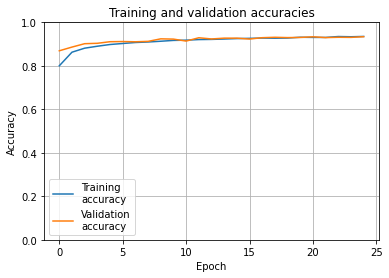

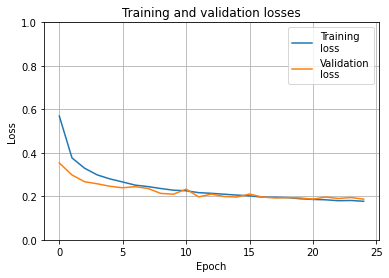

Training time (25 epochs): 3.89 min
Test loss: 0.2067
Test accuracy: 0.9254

Performance of the unregularized model:



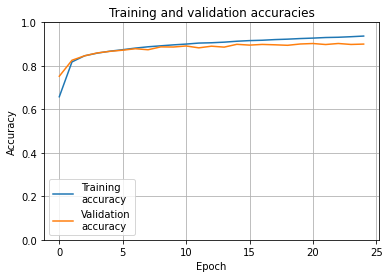

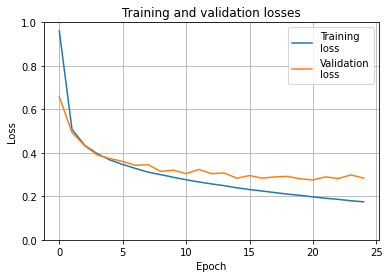

Training time (25 epochs): 3.21 min
Test loss: 0.3001
Test accuracy: 0.8975



In [ ]:
# print out performance of regularized model
print("Performance of the regularized model:\n")
plot_performance(reg_history)
print("Training time (25 epochs): {} min".format(reg_time))
print("Test loss: {0:.{1}}".format(reg_test_loss, 4))
print("Test accuracy: {0:.{1}}\n".format(reg_test_acc, 4))

# print out performance of unregularized model
print("Performance of the unregularized model:\n")
plot_performance(unreg_history)
print("Training time (25 epochs): {} min".format(unreg_time))
print("Test loss: {0:.{1}}".format(unreg_test_loss, 4))
print("Test accuracy: {0:.{1}}\n".format(unreg_test_acc, 4))

#### Model discussion
The regularized model seem to have an almost perfect fit since the validation loss has not started to deviate from the training loss curve noticeably. In addition, the test results (\~93%, 0.20) are even better than those obtained from the regularized model with early stopping in laboration 1 (\~92%, 0.22), which supports the statement of a good fit.

The unregularized model, on the other hand, is clearly overfitted since the validation loss did not decrease in the same pace as the traning loss. Towards the end, the validation loss started to increase. Further, the results are obivously worse, with an accuracy of barely 90% and a loss of almost 0.3. Hence, we can conclude, for this model architecture, that regularization prevents overfitting, improves the model and ultimately its performance.


### Regularized model with early stopping

In [ ]:
# training timer
start = time.time()

# implement early stopping with patience of 3 epochs to the regularized model
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)]

# reset weights of regularized model
reg_cnn.set_weights(init_weights)

# refit the model
es_history = reg_cnn.fit(train_images,
                         train_labels,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_split=validation_split,
                         callbacks=my_callbacks,
                         verbose=2)

end = time.time()
es_time = round((end - start) / 60, 2)

Epoch 1/25
500/500 - 9s - loss: 0.7814 - accuracy: 0.7417 - val_loss: 0.5809 - val_accuracy: 0.7842
Epoch 2/25
500/500 - 9s - loss: 0.5072 - accuracy: 0.8217 - val_loss: 0.3787 - val_accuracy: 0.8621
Epoch 3/25
500/500 - 9s - loss: 0.4385 - accuracy: 0.8449 - val_loss: 0.3198 - val_accuracy: 0.8818
Epoch 4/25
500/500 - 9s - loss: 0.3970 - accuracy: 0.8576 - val_loss: 0.3047 - val_accuracy: 0.8864
Epoch 5/25
500/500 - 9s - loss: 0.3737 - accuracy: 0.8669 - val_loss: 0.2894 - val_accuracy: 0.8931
Epoch 6/25
500/500 - 9s - loss: 0.3502 - accuracy: 0.8739 - val_loss: 0.2760 - val_accuracy: 0.8974
Epoch 7/25
500/500 - 9s - loss: 0.3298 - accuracy: 0.8804 - val_loss: 0.2687 - val_accuracy: 0.9012
Epoch 8/25
500/500 - 9s - loss: 0.3187 - accuracy: 0.8831 - val_loss: 0.2562 - val_accuracy: 0.9043
Epoch 9/25
500/500 - 9s - loss: 0.3073 - accuracy: 0.8890 - val_loss: 0.2673 - val_accuracy: 0.9021
Epoch 10/25
500/500 - 9s - loss: 0.2980 - accuracy: 0.8911 - val_loss: 0.2535 - val_accuracy: 0.9070

In [ ]:
# test the model
es_test_loss, es_test_acc = reg_cnn.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.2471 - accuracy: 0.9123


#### Performance with early stopping

Performance of the regularized model with early stopping:



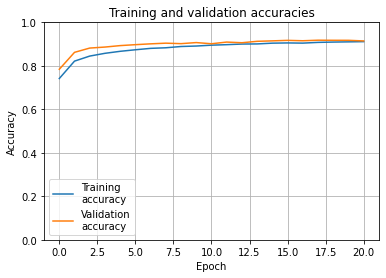

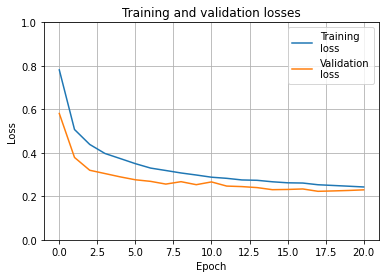

No. of epochs trained: 21
Training time: 3.13
Test loss: 0.2471
Test accuracy: 0.9123


In [ ]:
# print out performance of regularized model with early stopping
print("Performance of the regularized model with early stopping:\n")
plot_performance(es_history)
print("No. of epochs trained: {}".format(len(es_history.history["loss"])))
print("Training time: {}".format(es_time))
print("Test loss: {0:.{1}}".format(es_test_loss, 4))
print("Test accuracy: {0:.{1}}".format(es_test_acc, 4))

#### Discussion: Early stopping
Firstly, the model trained for 21 (of 25 possible) epochs until the early stopping callback terminated the training. On one hand, this is good since the validation loss evidently increased for the last three epochs. On the other hand, the model most likely would have needed a few more epochs of training since the validation loss was consistently lower than the training loss. Therefore, we can argue that we had an "unlucky run" where the early stopping had an negative effect on the model's performance. This is also reflected in the test results of the model with a lower accuracy and higher loss than the model with regularization only. However, the model with only regularization had a good fit, and based on these runs it is not really necessary with early stopping in the first place.

Secondly, the optimizer, as discussed in laboration 1, is nondeterministic which means that there is inherent randomness in the optimizing procedure. Besides the regularization that is not applied during validation, the stochastic nature of the optimizer algorithm can explain some of the variation between the runs in this laboration. Therefore, it would be necessary to execute e.g. 20-30 runs of the model with and without early stopping to be able to draw a reliable conclusion wheter early stopping improves the model or not. I.e., we have to balance between the probability of overfitting when not applying early stopping, and the probability of not obtaining a fully generalized (or underfitted) model with early stopping.

